In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import signal

In [225]:
stats = pd.read_csv('stats.csv')
stats.columns

Index(['date', 'business', 'category', 'item_description', 'document',
       'document_ID', 'client_name', 'packaging', 'unit_cost', 'sold_quantity',
       'total_cost', 'unit_price', 'total_sale_price', 'delivery_price',
       'gross_profit', 'total_taxes', 'total_tax_retention', 'current_balance',
       'amount_paid', 'payment_dates', 'gross_profit_percentage', 'address',
       'client_ID', 'item_ID', 'year_extracted', 'month_extracted',
       'day_extracted'],
      dtype='object')

In [226]:
def time_series_plot(df):
    # This functions is use to create the time series from each item that is been sold
    # what is doing is that grab the actual day of the register and concatenating the
    # year and week putting x-axis = Week of the Year and y-axis = the added quantity sold per week per year
    df['date'] = pd.to_datetime(df['date'])
    df = df[df['item_description'] == 'Botella_750ml']
    
    df = df[['year_extracted','date', 'item_description','unit_cost','unit_price', 'sold_quantity']]
    df['year_week'] = df['date'].dt.strftime('%Y-%U')
    df_summed = df.groupby(['year_week','item_description']).agg({'unit_cost': 'mean', 'sold_quantity': 'sum', 'unit_price': 'mean'})
    df_summed = df_summed.reset_index()

    n = len(pd.unique(df_summed['item_description']))
    item_description = pd.unique(df_summed['item_description'])

    print(df_summed.shape)

    fig, axs = plt.subplots(nrows=n, ncols=1, figsize=(30, 5 * n), dpi=80)
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Amount of quantities sold per week", fontsize=18, y=0.1)
    
    if n == 1:  
        axs = [axs]

    for idx, item in enumerate(item_description):
        item_data = df_summed[df_summed['item_description'] == item]
        ax = axs[idx]
        ax.plot(item_data['year_week'], item_data['unit_cost'], marker='o')
        ax.plot(item_data['year_week'], item_data['unit_price'], marker='o')
        ax.plot(item_data['year_week'], item_data['sold_quantity'], marker='o')
        ax.set_title(item.upper())
        ax.set_xlabel("Year Week")
        ax.set_xticklabels(item_data['year_week'], rotation=45)
        ax.set_ylabel("Quantities that has been sold")
        
        ax.grid(True)

    plt.show()

(146, 5)


C:\Users\andre\AppData\Local\Temp\ipykernel_38688\3440315012.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(item_data['year_week'], rotation=45)


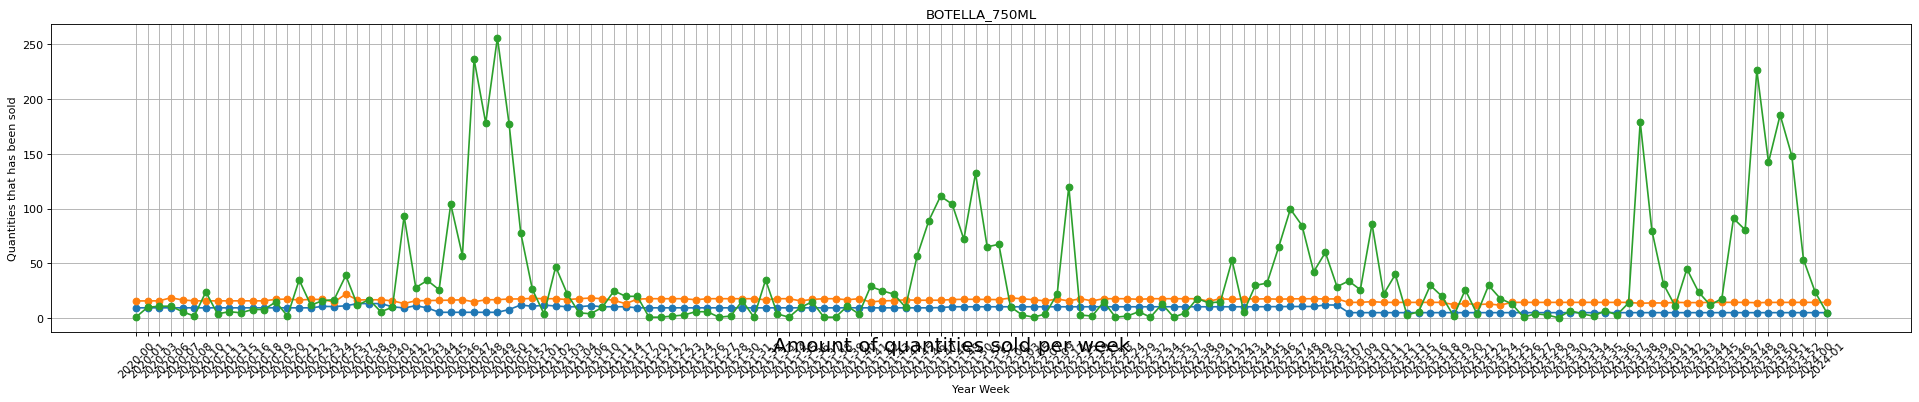

In [227]:
time_series_plot(stats)

In [228]:
def distribution_plot(df):

    df['date'] = pd.to_datetime(df['date'])
    df = df[df['item_description'] == 'Botella_750ml']
    
    df = df[['year_extracted','date', 'item_description','unit_cost','unit_price', 'sold_quantity']]
    df['year_week'] = df['date'].dt.strftime('%Y-%U')
    df_summed = df.groupby(['year_week','item_description']).agg({'unit_cost': 'mean', 'sold_quantity': 'sum', 'unit_price': 'mean'})
    df_summed = df_summed.reset_index()

    n = len(pd.unique(df_summed['item_description']))
    item_description = pd.unique(df_summed['item_description'])

    print(df_summed.shape)

    fig, axs = plt.subplots(nrows=n, ncols=1, figsize=(30, 5 * n), dpi=80)
    plt.subplots_adjust(hspace=0.5)
    
    if n == 1:  
        axs = [axs]

    for idx, item in enumerate(item_description):
        item_data = df_summed[df_summed['item_description'] == item]
        ax = axs[idx]
        sns.histplot(item_data['sold_quantity'], kde=True, ax=ax)
        ax.set_title(item.upper())
        ax.set_xlabel("Quantities")
        ax.set_ylabel("Frequency")
        ax.grid(True)

    plt.show()

(146, 5)


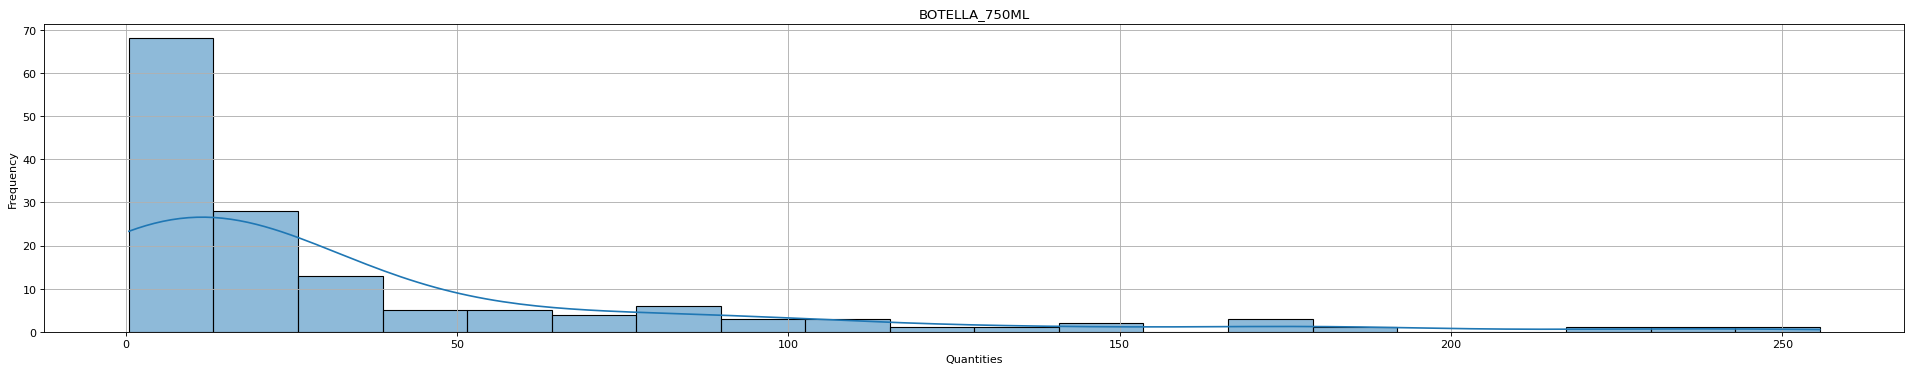

In [229]:
distribution_plot(stats)

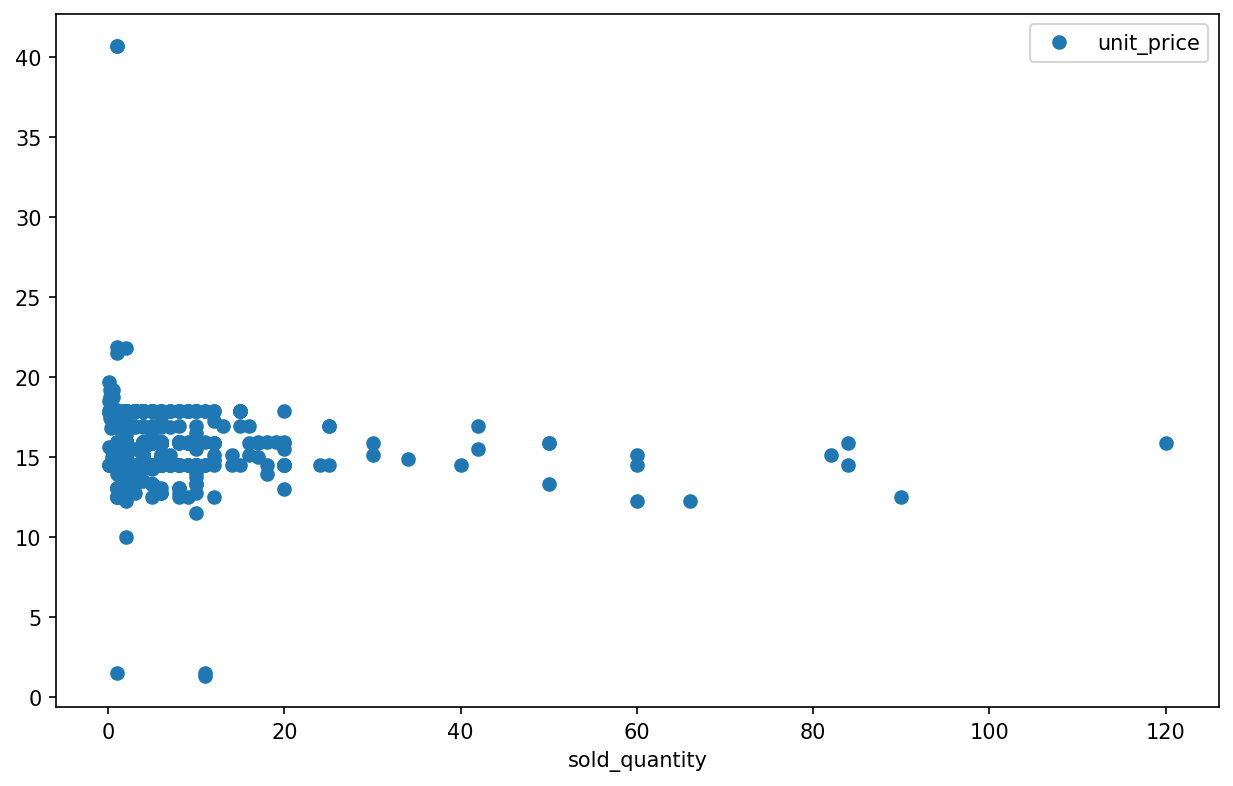

In [230]:
def scatter_plot(df):

    df = df[df['item_description'] == 'Botella_750ml']

    df.plot(x='sold_quantity', y='unit_price', style='o')

scatter_plot(stats)
    

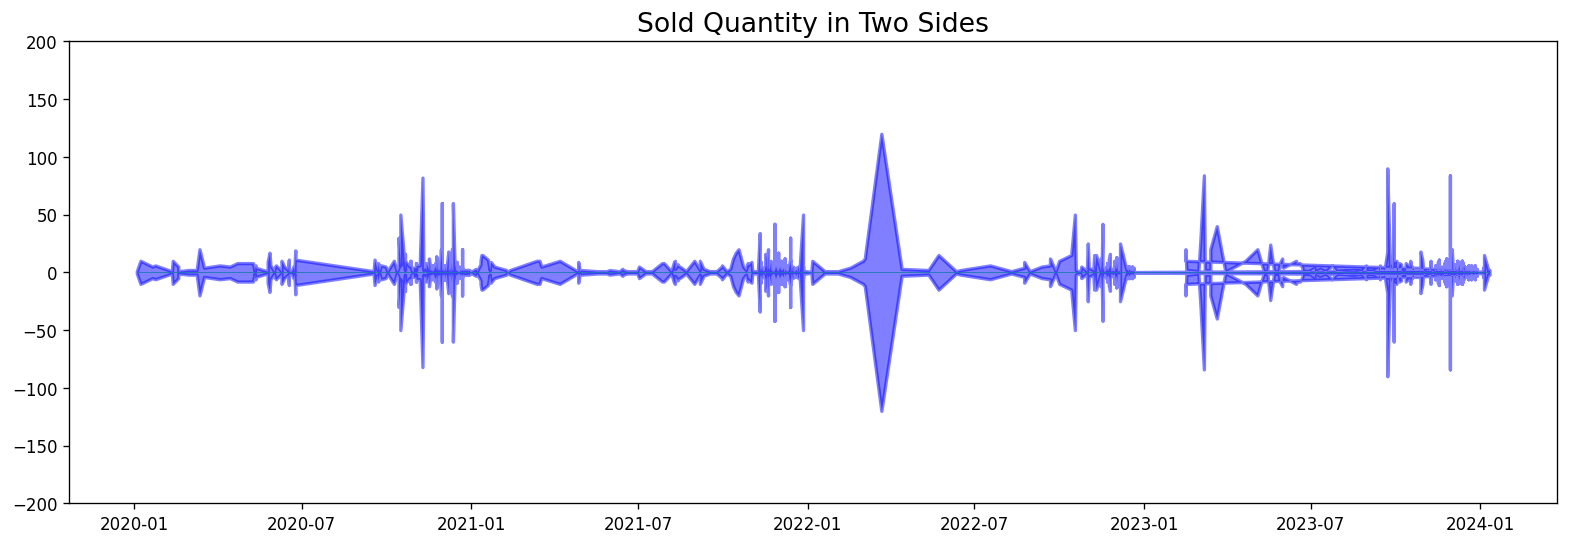

In [231]:
def two_sides(df):

    df = df[df['item_description'] == 'Botella_750ml']

    x = df['date'].values
    y1 = df['sold_quantity'].values

    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='blue')
    plt.ylim(-200, 200)
    plt.title('Sold Quantity in Two Sides', fontsize=16)
    plt.hlines(y=0, xmin=np.min(df['date']), xmax=np.max(df['date']), linewidth=.5)
    plt.show()

two_sides(stats)
    

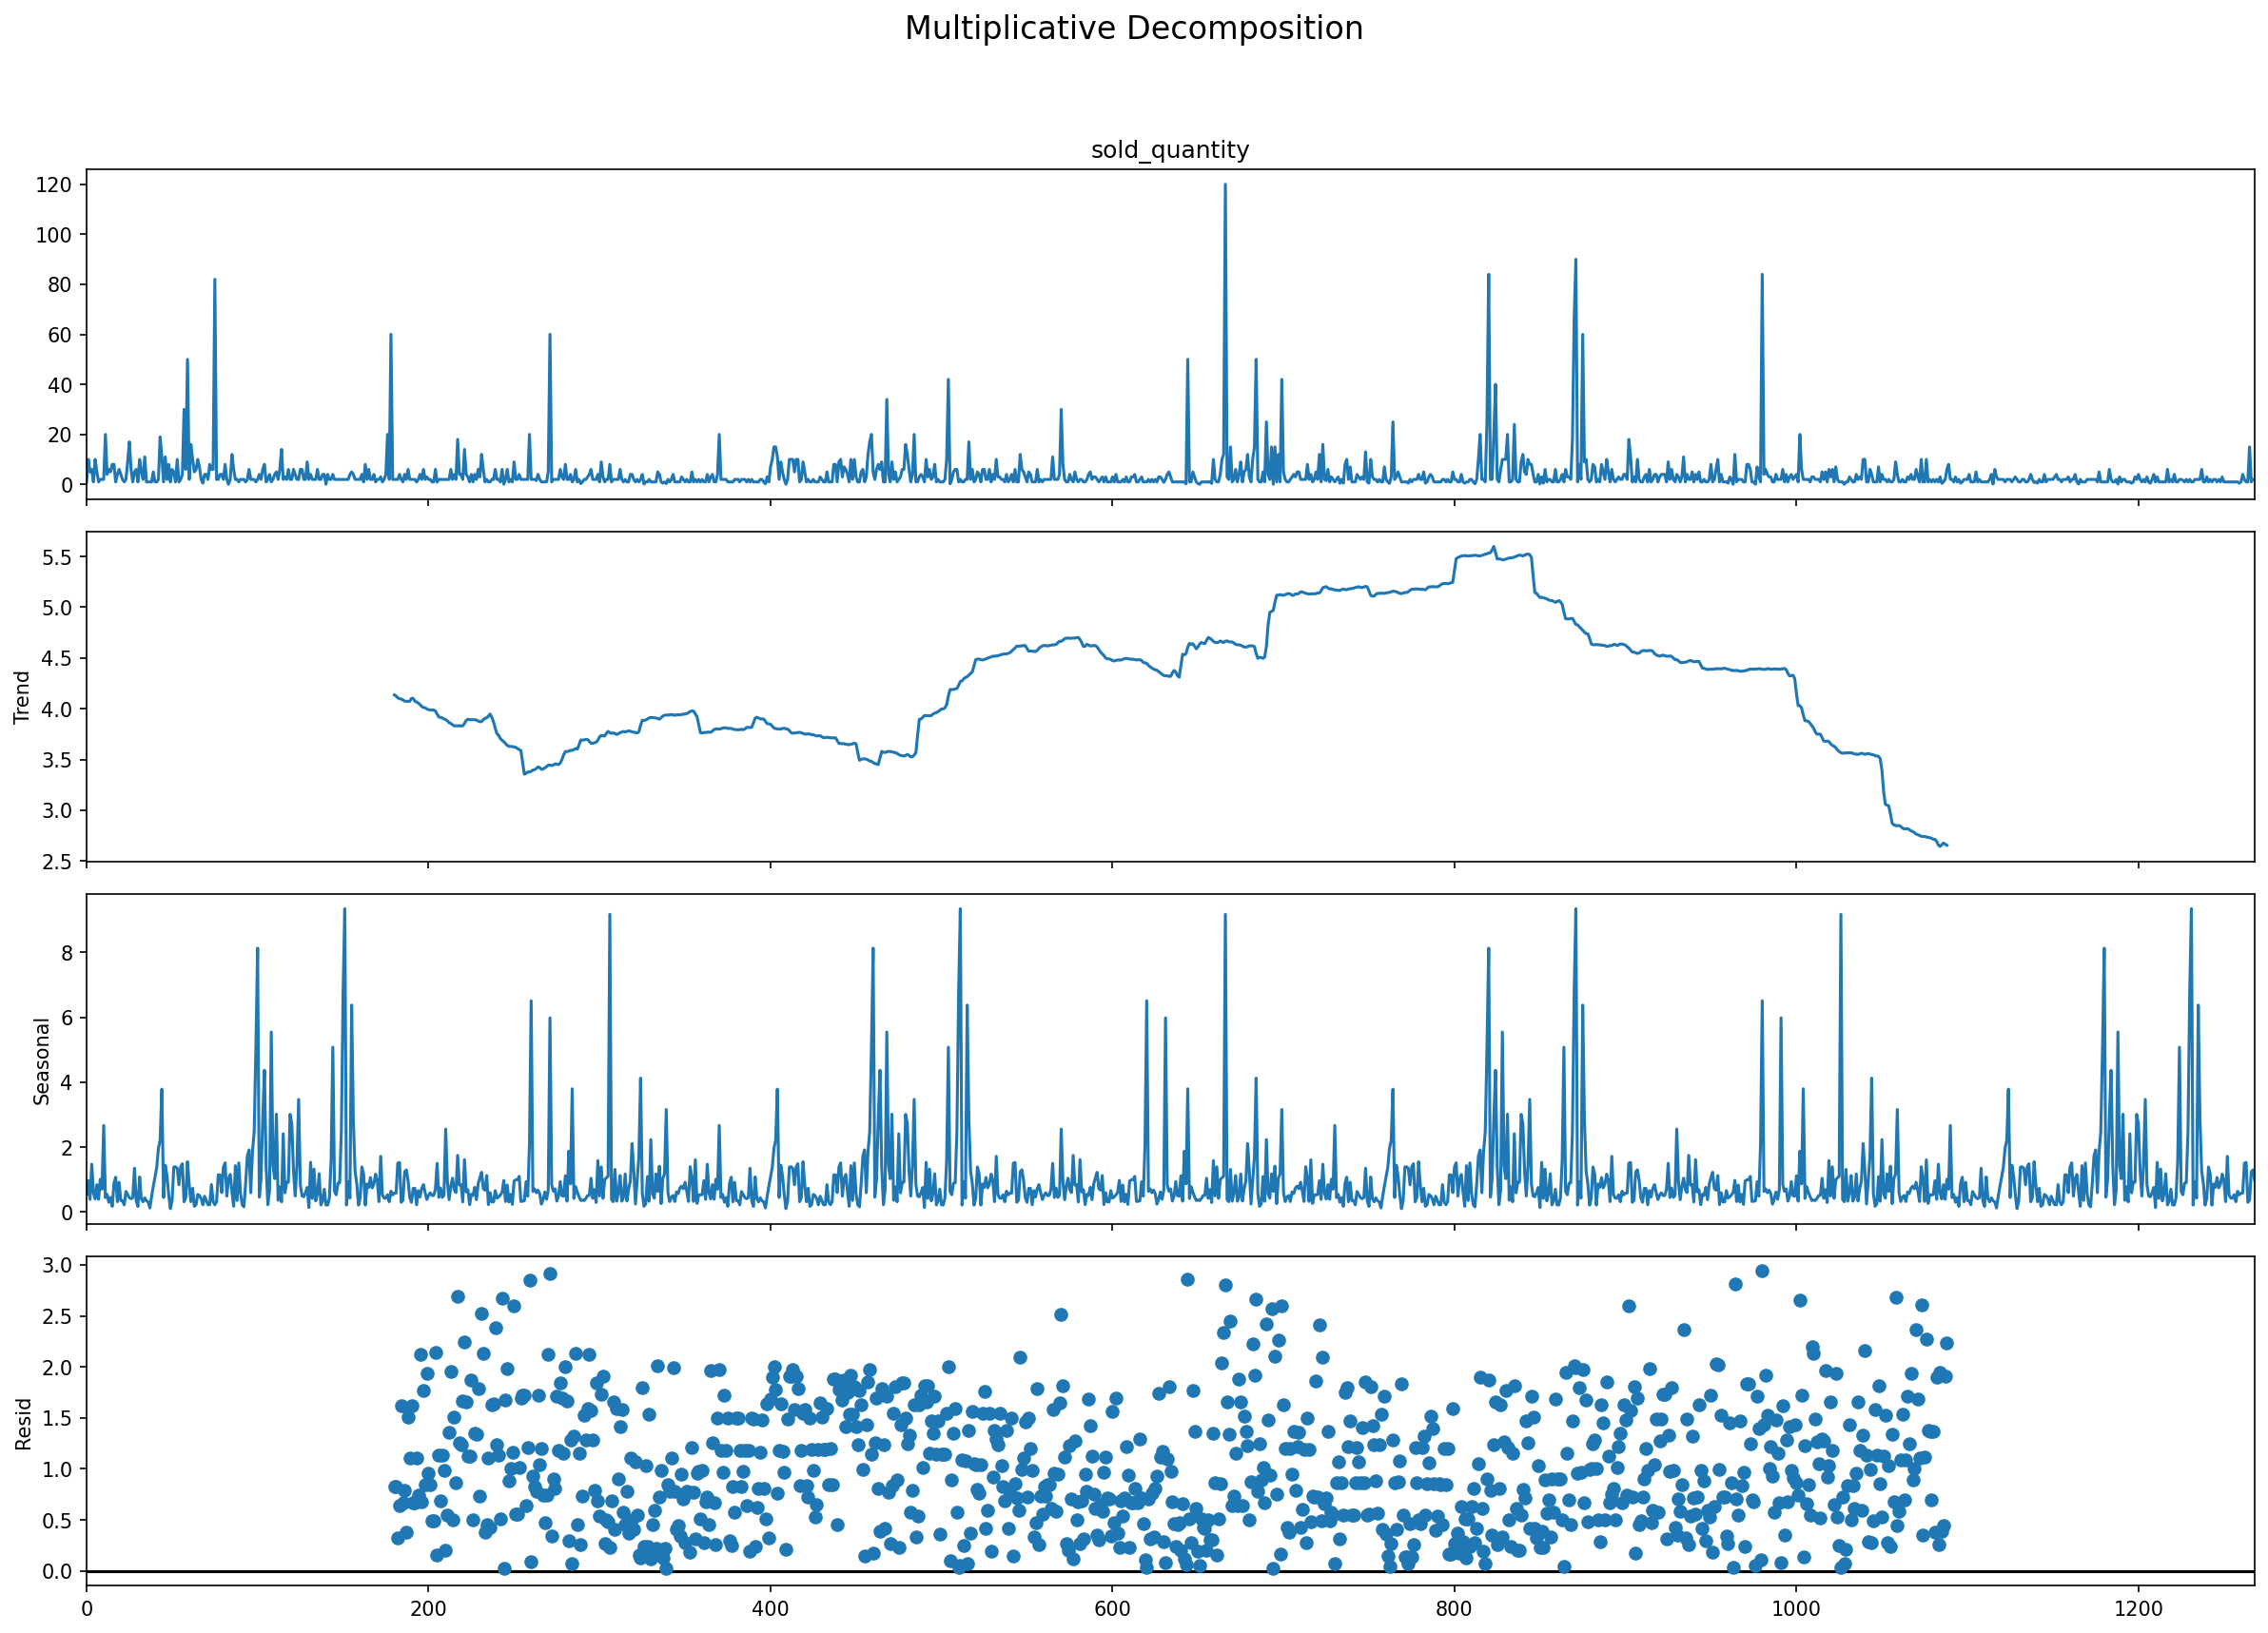

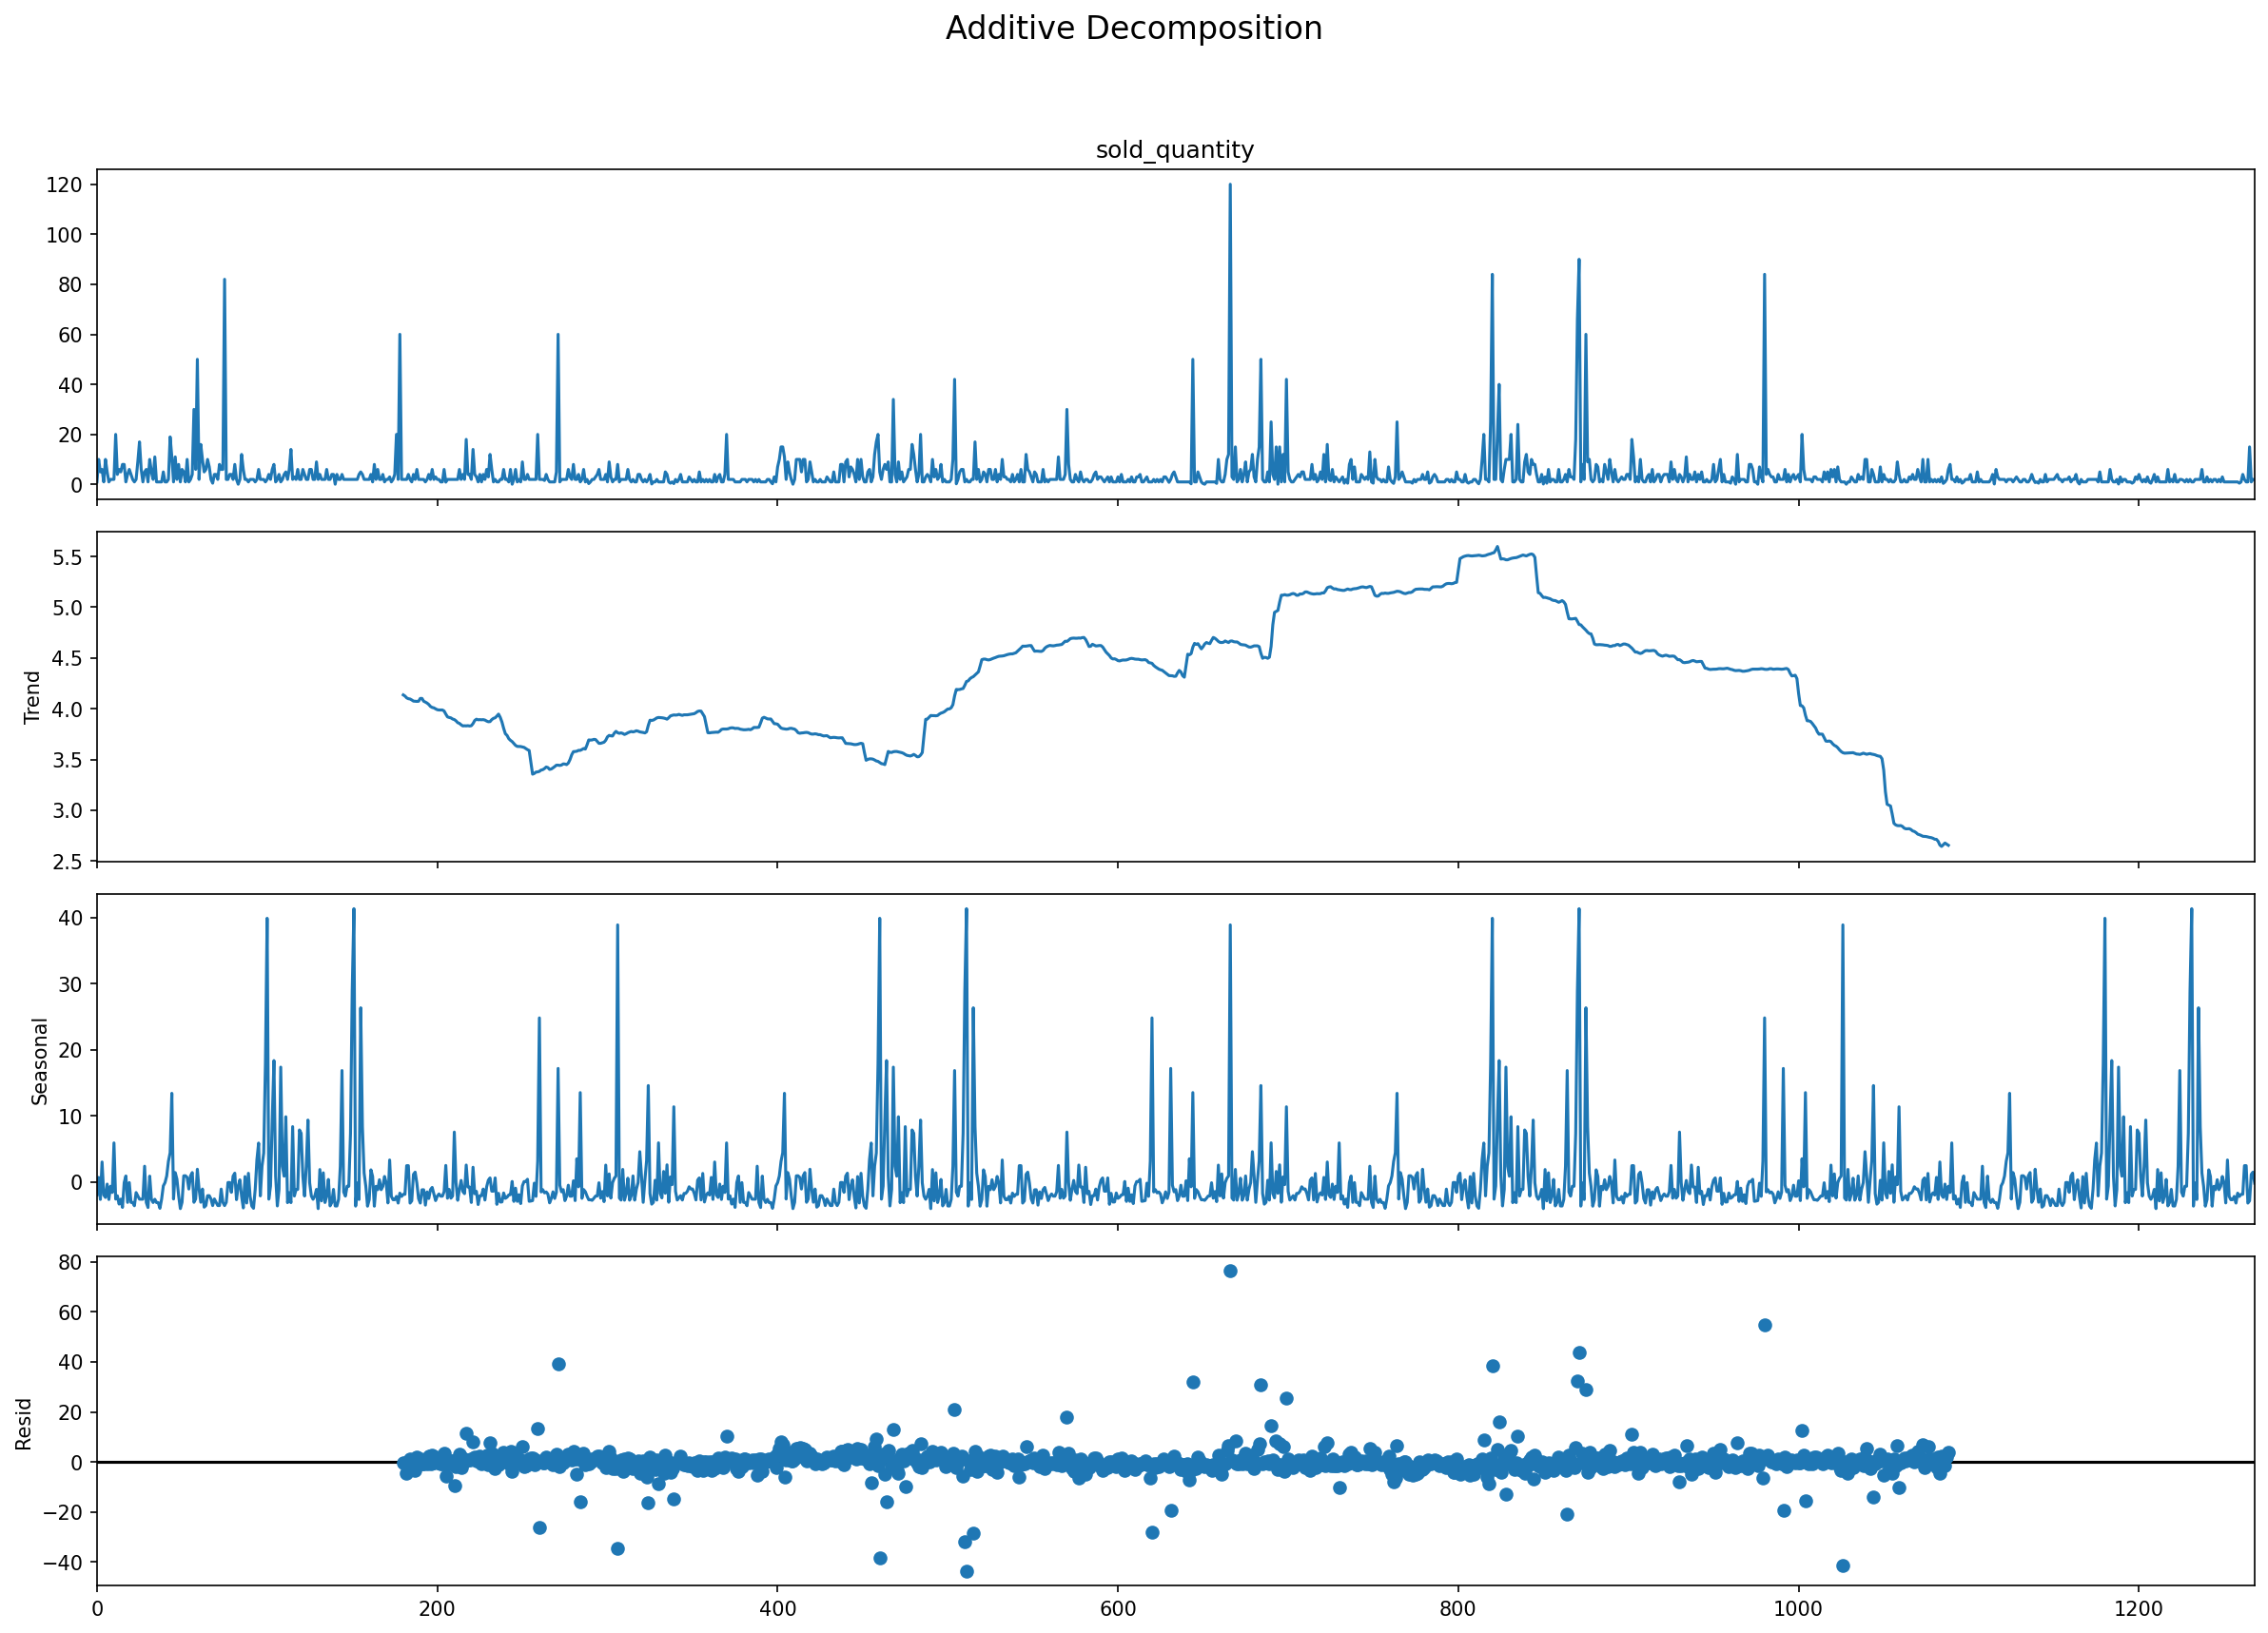

In [232]:
def decomposition_time_series(df):

    df = df[df['item_description'] == 'Botella_750ml']

    x = df['date'].values
    y = df['sold_quantity'].values

    data = {'date': x, 'sold_quantity': y}
    df = pd.DataFrame(data)
   
    # Multiplicative Decomposition 
    multiplicative_decomposition = seasonal_decompose(df['sold_quantity'], model='multiplicative', period=360)

    # Additive Decomposition
    additive_decomposition = seasonal_decompose(df['sold_quantity'], model='additive', period=360)

    # Plot
    plt.rcParams.update({'figure.figsize': (16,12)})
    multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

decomposition_time_series(stats)

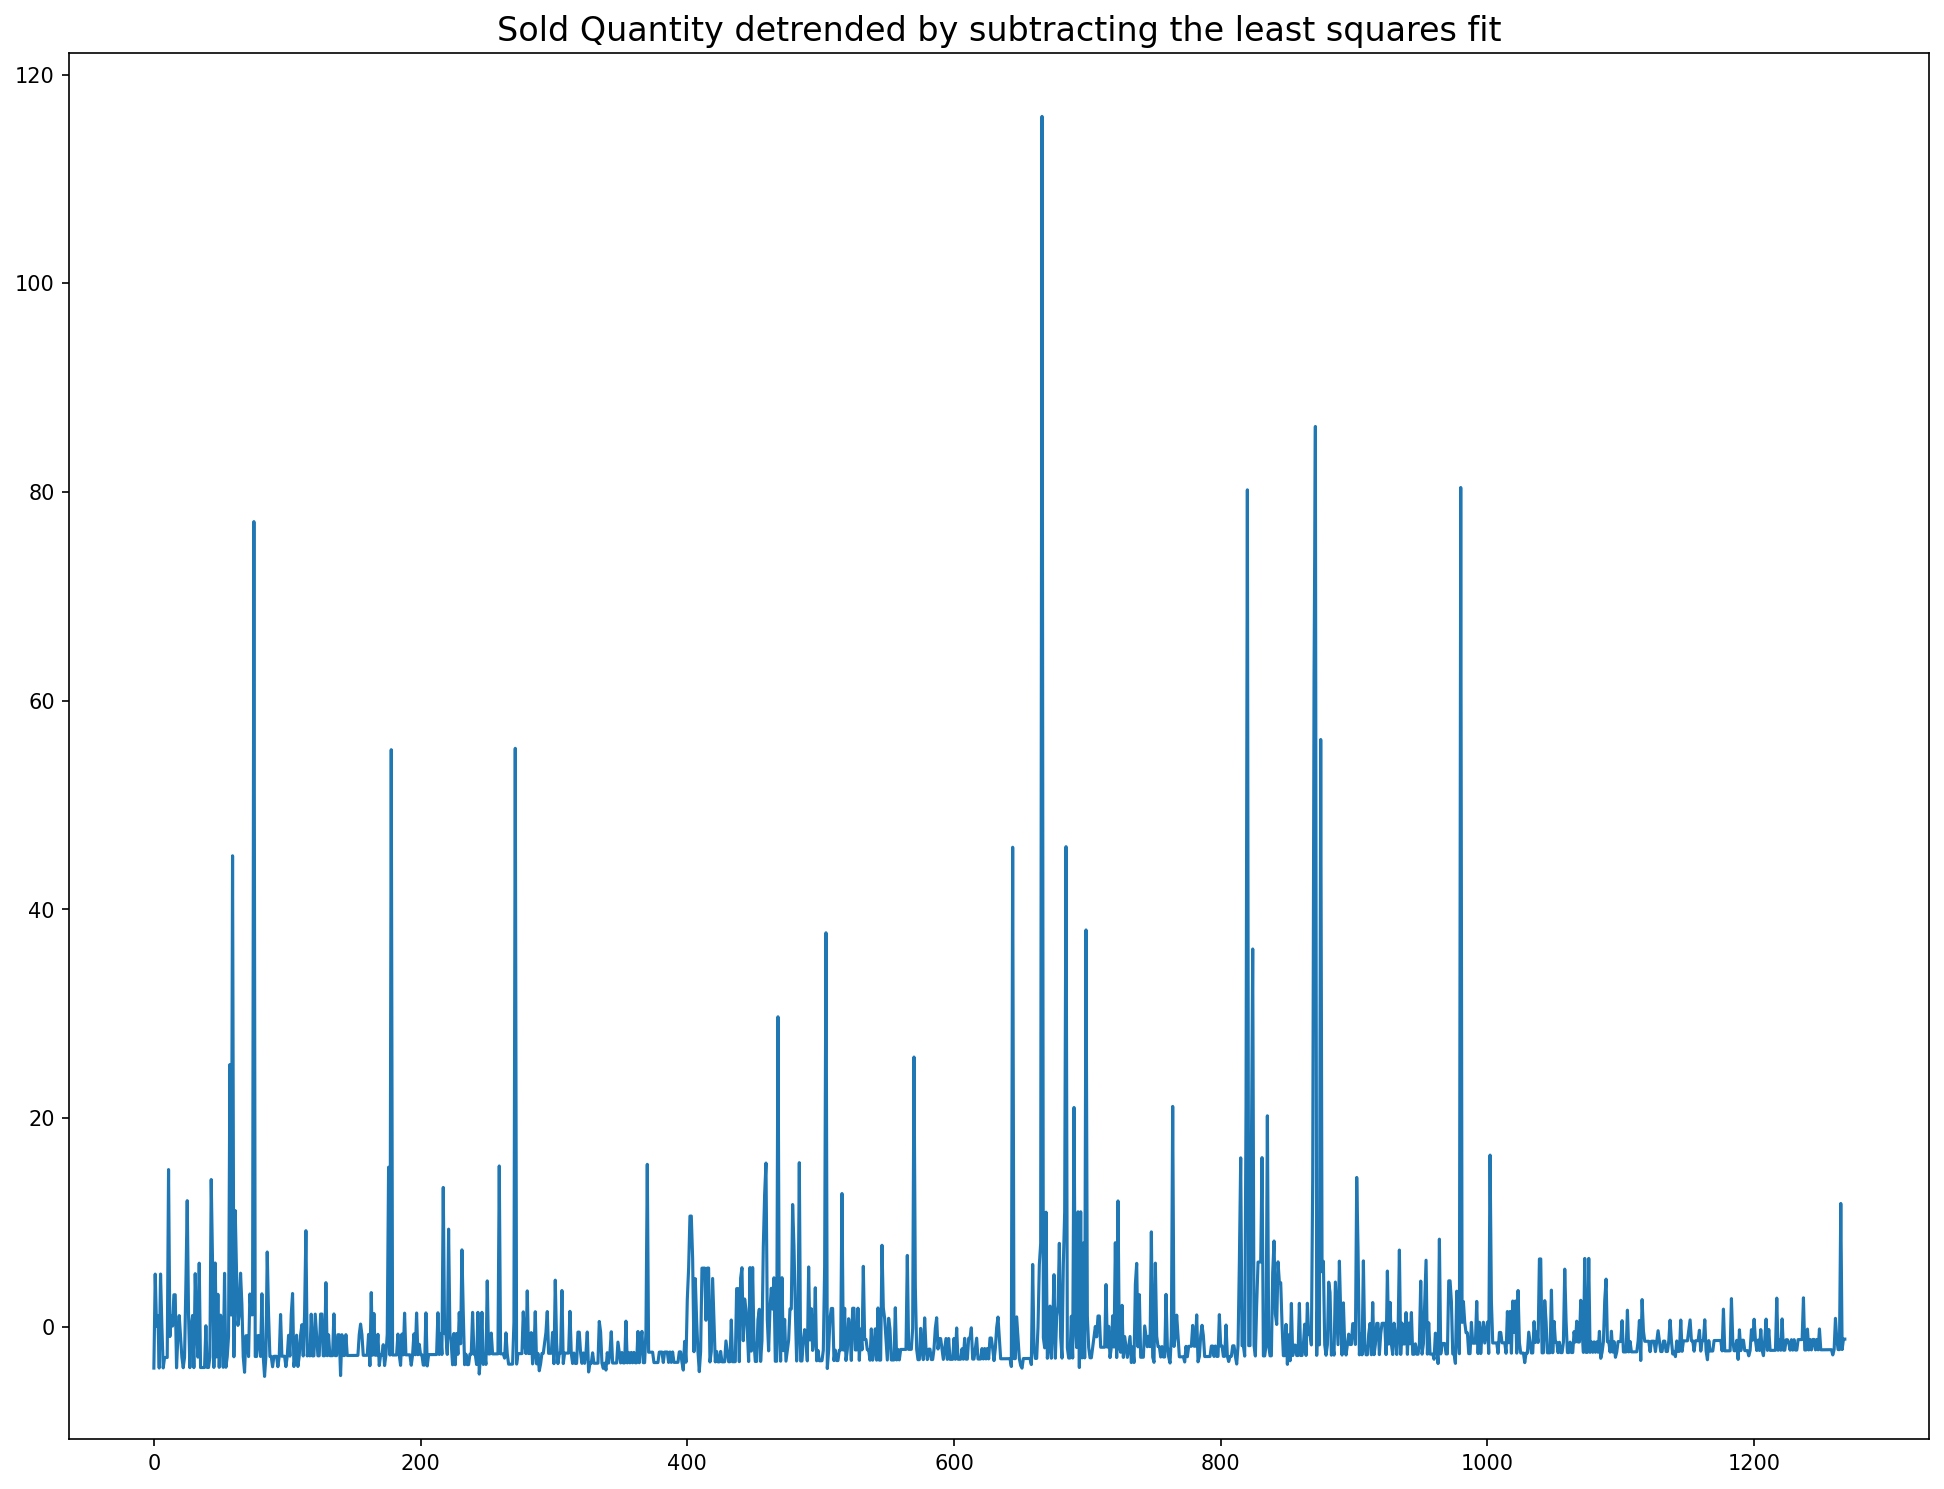

In [233]:
def signal_series(df):

    df = df[df['item_description'] == 'Botella_750ml']

    x = df['date'].values
    y = df['sold_quantity'].values

    data = {'date': x, 'sold_quantity': y}
    df = pd.DataFrame(data)

    detrended = signal.detrend(df['sold_quantity'].values)
    plt.plot(detrended)
    plt.title('Sold Quantity detrended by subtracting the least squares fit', fontsize=16)

signal_series(stats)

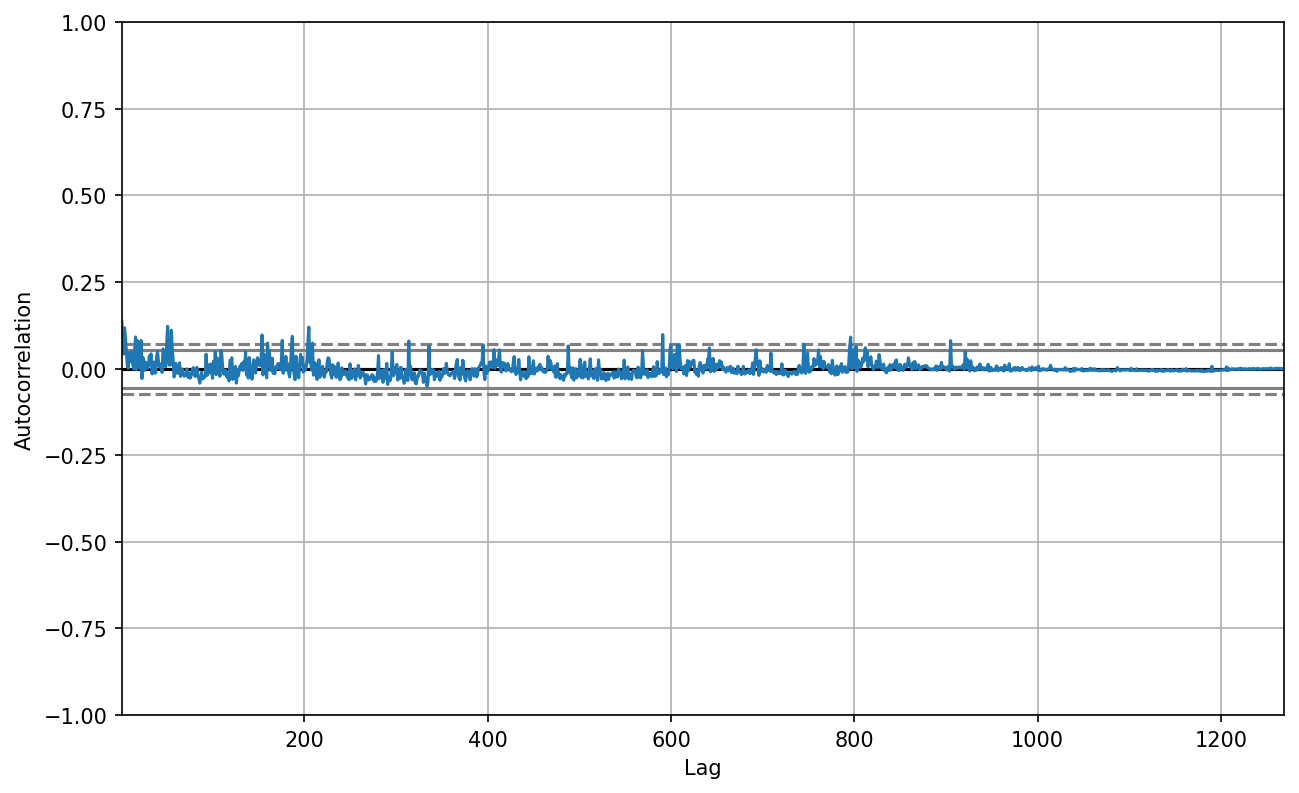

In [234]:
def autocorrelation(df):

    df = df[df['item_description'] == 'Botella_750ml']

    x = df['date'].values
    y = df['sold_quantity'].values

    data = {'date': x, 'sold_quantity': y}
    df = pd.DataFrame(data)

    plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':150})
    autocorrelation_plot(df['sold_quantity'].tolist())

autocorrelation(stats)

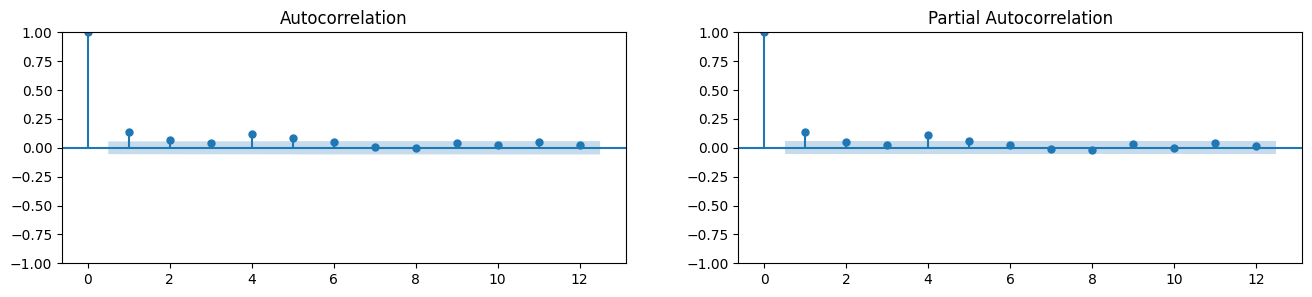

In [235]:
def autocorrelation_partialcorrelation(df):

    df = df[df['item_description'] == 'Botella_750ml']

    x = df['date'].values
    y = df['sold_quantity'].values

    data = {'date': x, 'sold_quantity': y}
    df = pd.DataFrame(data)

    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plot_acf(df['sold_quantity'].tolist(), lags=12, ax=axes[0])
    plot_pacf(df['sold_quantity'].tolist(), lags=12, ax=axes[1])

autocorrelation_partialcorrelation(stats)